In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from torchvision import models

train_set = datasets.ImageFolder(root = './data/zajads_sample',
                transform = transforms.ToTensor())

In [2]:
def imshow(data):
    for img,_ in data:
        plt.imshow(img.permute(1,2,0).numpy())
        plt.show()


def imshow_many(imgs):
    n = len(imgs)
    if n < 20:
        cols = 5
        rows = int((n + 4) / 5)
        fig = plt.figure(figsize=(cols * 4, rows * 4))
    else:
        cols = 10
        rows = int((n + 9) / 10)
        fig = plt.figure(figsize=(cols * 2, rows * 2))

    for i in range(n):
        sub = fig.add_subplot(rows, cols, i + 1)
        sub.imshow(imgs[i][0].permute(1,2,0).numpy(), interpolation='nearest')
    plt.show()

7618


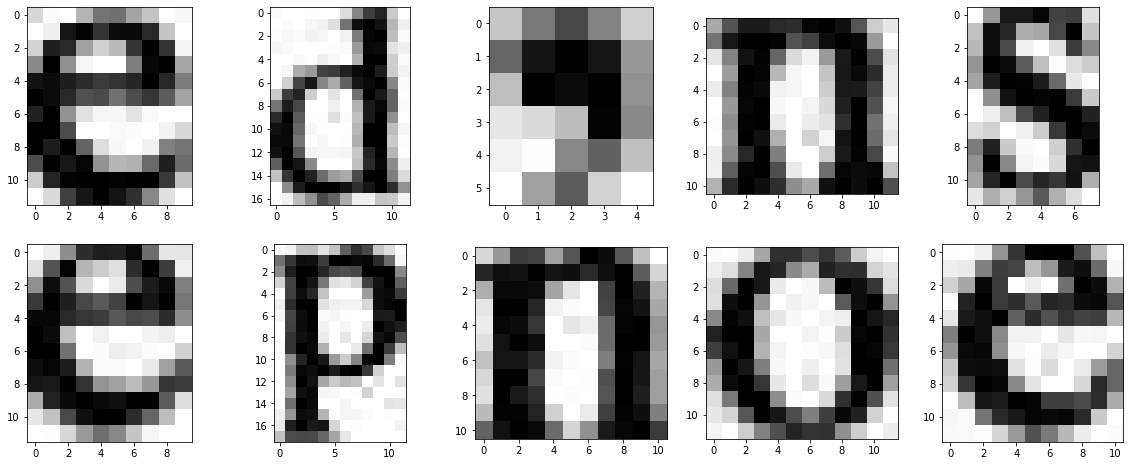

In [3]:
print(len(train_set))

imshow_many([train_set[i] for i in range(10)])

# Siema bieda

In [17]:
import os
import random

def filenames(indices=[], basename=False):
    if indices: 
        # grab specific indices
        if basename:
            return [os.path.basename(train_set.imgs[i][0]) for i in indices]
        else:
            return [train_set.imgs[i][0] for i in indices]
    else:
        if basename:
            return [os.path.basename(x[0]) for x in train_set.imgs]
        else:
            return [x[0] for x in train_set.imgs]
filenames(basename=True)[:10]

['1_100-377.png',
 '1_100-447.png',
 '1_101-684.png',
 '1_101-751.png',
 '1_102-353.png',
 '1_102-701.png',
 '1_103-253.png',
 '1_104-502.png',
 '1_107-303.png',
 '1_107-651.png']

In [19]:
samples = filenames()[:100]
labels = (np.arange(100)/10).astype(np.byte)
random.shuffle(labels)
labels

array([5, 9, 3, 2, 7, 1, 8, 9, 7, 4, 1, 5, 0, 3, 0, 3, 8, 0, 4, 4, 1, 9,
       0, 0, 5, 3, 9, 3, 6, 1, 2, 8, 0, 7, 8, 9, 7, 6, 8, 9, 8, 8, 0, 2,
       7, 6, 9, 7, 7, 5, 6, 3, 4, 1, 1, 2, 4, 0, 5, 7, 2, 5, 1, 8, 5, 7,
       6, 2, 3, 2, 2, 9, 3, 1, 8, 6, 3, 8, 4, 4, 9, 5, 5, 4, 2, 0, 3, 4,
       5, 6, 7, 0, 4, 1, 6, 9, 1, 6, 2, 6], dtype=int8)

In [20]:
labeled = sorted([x for x in zip(samples, labels)], key = lambda x : x[1])
labeled[:5]

[('./data/zajads_sample/1/1_110-328.png', 0),
 ('./data/zajads_sample/1/1_111-278.png', 0),
 ('./data/zajads_sample/1/1_112-377.png', 0),
 ('./data/zajads_sample/1/1_115-397.png', 0),
 ('./data/zajads_sample/1/1_115-621.png', 0)]

In [25]:
HTML_FILE_BEGINING = """
<!doctype html>

<html lang="en">
<body>
"""

HTML_FILE_END="""
</body>
</html>
"""


def printToHtml(data, filename='out.html'):
    with open('out.html', 'w+') as f:
        f.write(HTML_FILE_BEGINING)
        _,last_group = data[0]
        for fname,group in data :
            if group != last_group :
                f.write("<HR>")
                last_group = group
            f.write("<img src=\"{0}\" alt=\"{1}\">".format(fname, fname))
        
        f.write(HTML_FILE_END)

In [27]:
printToHtml(labeled)